# Introduction

Business forecasting is one implementation of time series forecasting. This forecasting is an essential technique for businesses to predict future trends and make informed decisions. I  utilize the application of the SARIMA (Seasonal AutoRegressive Integrated Moving Average) model, which is particularly effective for time series data exhibiting seasonality.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

In [ ]:
FILE_DIR = '/content/drive/MyDrive/Colab Notebooks/Dataset/adidas-quarterly-sales.csv'

In [ ]:
data = pd.read_csv(FILE_DIR)
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


In [ ]:
import plotly.express as px
figure = px.line(data, x="Time Period",
                 y="Revenue",
                 title='Quarterly Sales Revenue of Adidas in Millions')
figure.show()

<Figure size 640x480 with 0 Axes>

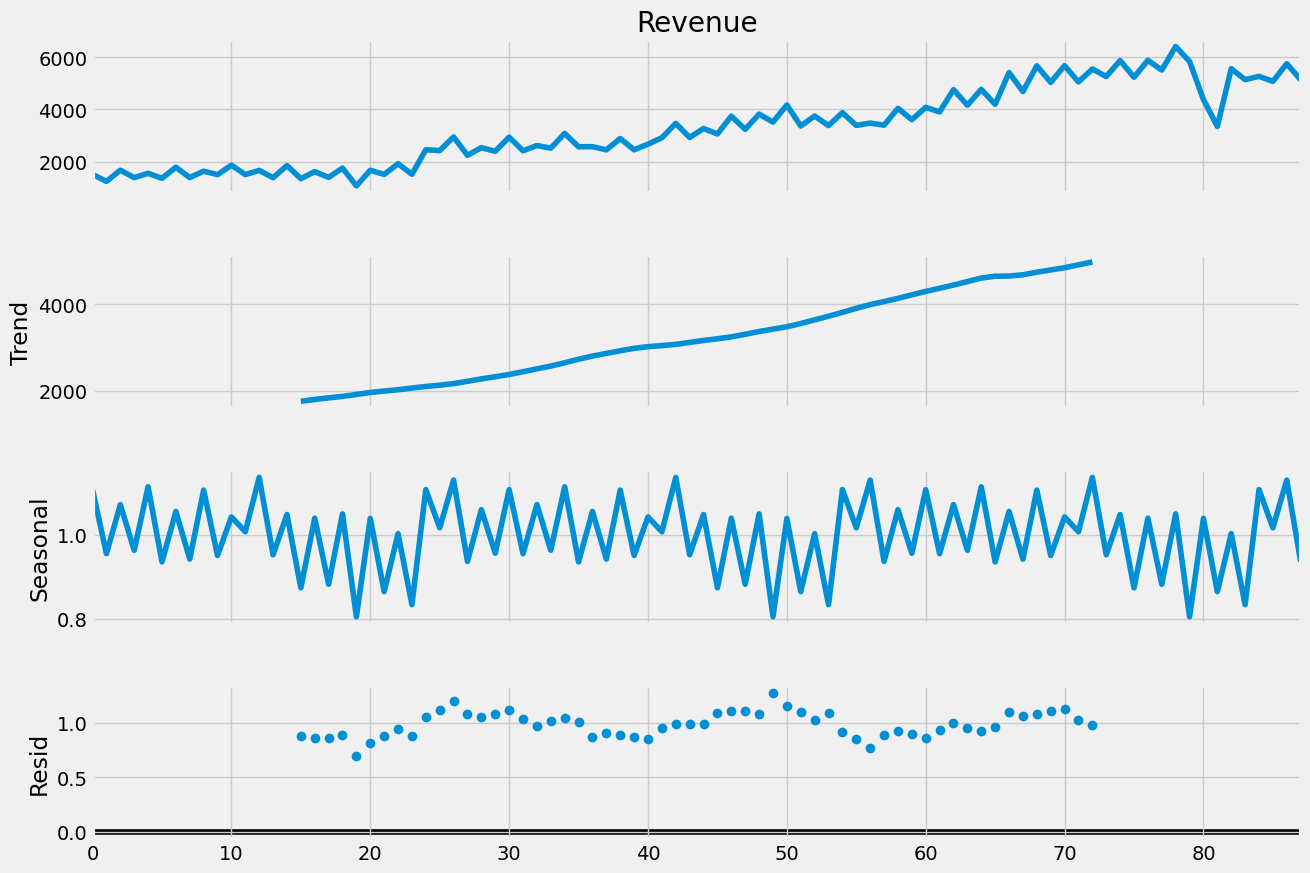

In [ ]:
result = seasonal_decompose(data["Revenue"],
                            model='multiplicative', period= 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

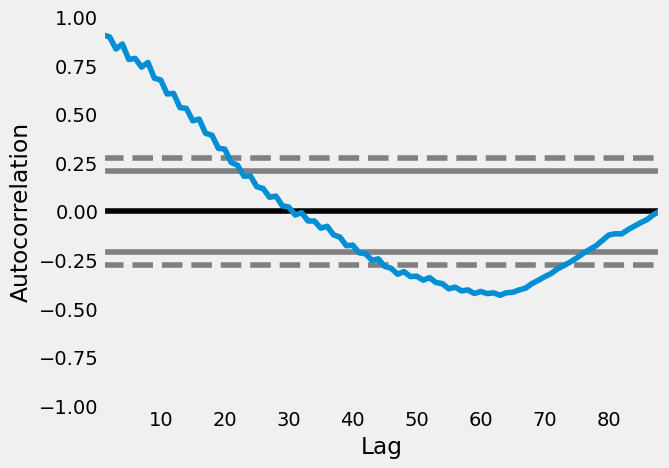

In [ ]:
pd.plotting.autocorrelation_plot(data["Revenue"])

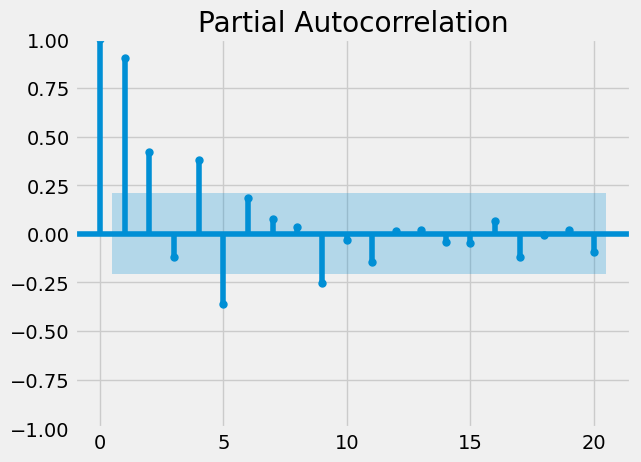

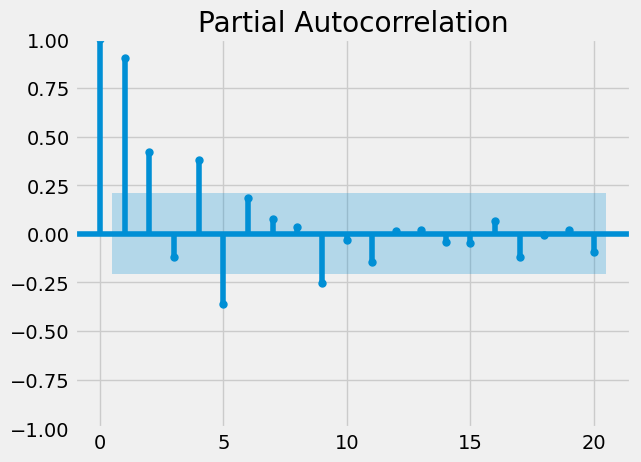

In [ ]:
plot_pacf(data["Revenue"], lags = 20)

### Train a SARIMA model

In [ ]:
p, d, q = 5, 1, 2 #autoregressive order, differencing order, moving average order
model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Sun, 09 Jun 2024   AIC                           1127.041
Time:                                    15:41:10   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5798      0.387     -4.077      0.000      -2.339      -0.820
ar.L2         -1.4322      0.586   

In [ ]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    6078.683746
89    5186.254952
90    6293.192812
91    5751.740662
92    5911.923606
93    5499.929306
94    6389.557803
95    5728.760623
Name: predicted_mean, dtype: float64


<Axes: >

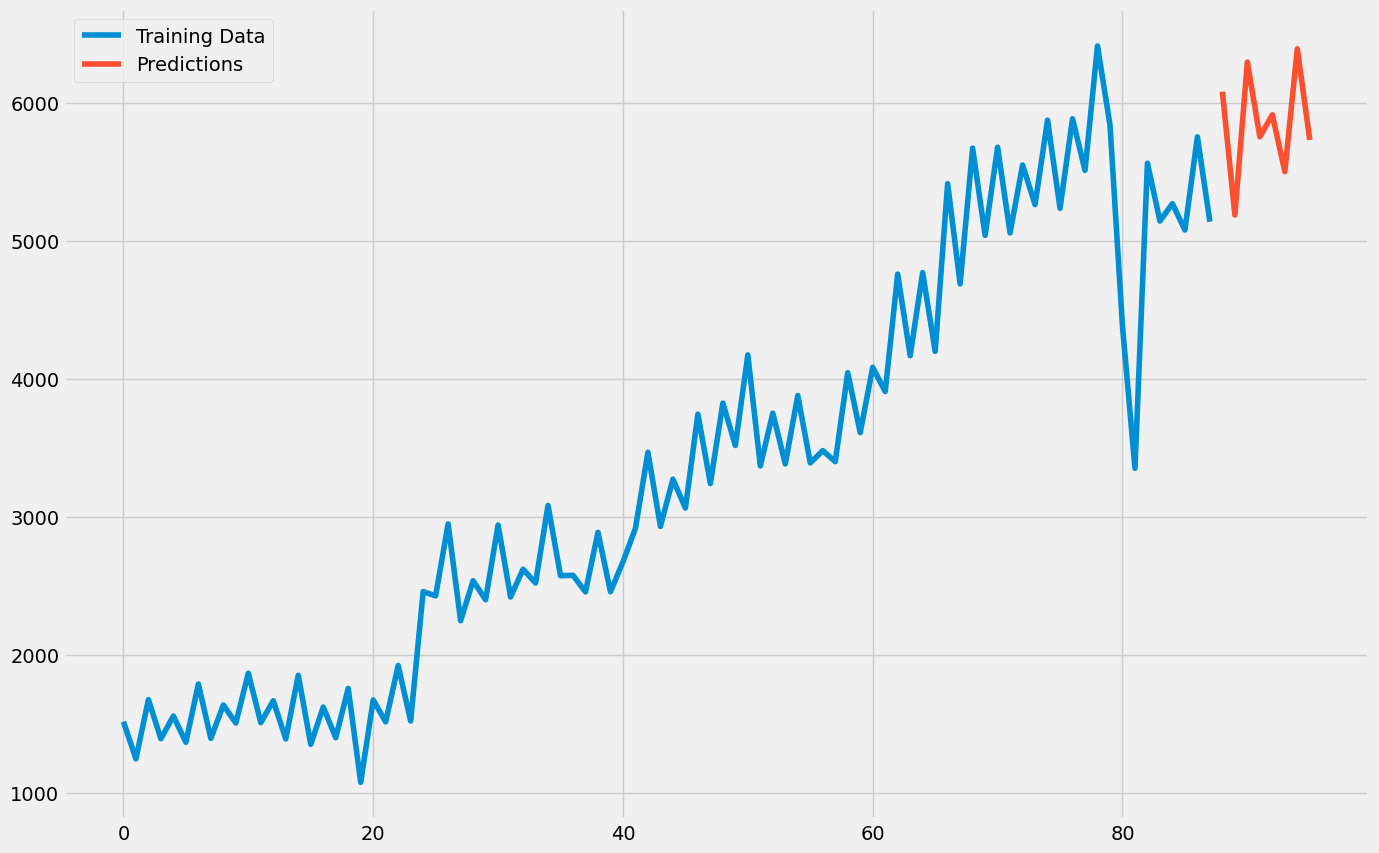

In [ ]:
data["Revenue"].plot(legend=True,
                     label="Training Data",
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

### Summary

The predictions continue the upward trend observed in the training data. Seasonal patterns in the predictions are consistent with those observed in the historical data, indicating that the model has captured the seasonal component effectively.